### Plot Bar Return Value dan Return Period

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

return_val_pd = pd.DataFrame({'return period (yr)':['100','50','20','10','5','2'],
                              'cilacap':[10.42, 10.04, 9.53, 9.14, 8.74, 8.22],
                              'pangandaran':[10.42, 10.04, 9.53, 9.14, 8.74, 8.22],
                              'indramayu':[3.60, 3.52, 3.40, 3.30, 3.19, 3.03],
                              'karangantu':[4.05, 3.92, 3.74, 3.60, 3.45, 3.24]
})

return_val_pd = return_val_pd.set_index('return period (yr)')

return_val_pd = return_val_pd.sort_values('cilacap')
return_val_pd

,cilacap,pangandaran,indramayu,karangantu
return period (yr),,,,
2,8.22,8.22,3.03,3.24
5,8.74,8.74,3.19,3.45
10,9.14,9.14,3.30,3.60
20,9.53,9.53,3.40,3.74
50,10.04,10.04,3.52,3.92
100,10.42,10.42,3.60,4.05


### Bar plot

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams["font.weight"] = "bold"
rcParams["axes.labelweight"] = "bold"

rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

rcParams['legend.fontsize'] = 16

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'STIXGeneral:italic'
rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'

Text(0, 0.5, 'Return Value [m]')

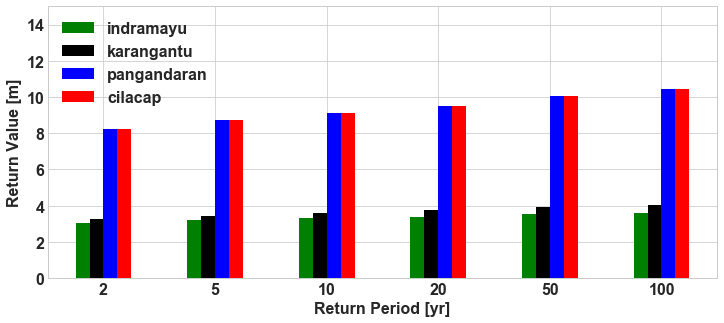

In [29]:
import matplotlib

matplotlib.style.use('seaborn-whitegrid')
return_val_pd[['indramayu','karangantu','pangandaran','cilacap']].plot(kind='bar',
                                                                       color=['green','black','blue','red'],
                                                                       figsize=(12,5)
)
plt.ylim(0,15)
plt.xticks(rotation=0)
plt.xlabel('Return Period [yr]', fontsize=16)
plt.ylabel('Return Value [m]', fontsize=16)

### t-test
In previous analysis, coefficient of correlation between Hmax and Wind speed was calculated for each location, that is, 
- Cilacap: 0.432282
- Pangandaran: 0.432282
- Indramayu: 0.826357
- Pelabuhan Karangantu: 0.606209

To make the results more trustable, statistical **t-test** will be performed, as you can see in cell block below.

In [3]:
from scipy.stats import t
import math
#n = len(hs_test) # Jumlah sampel
n = 4384
alpha = 0.05 # one tailed test
df = n - 2 # degree of freedom
#t_hit = (corr_test[0,]*math.sqrt(n-2)) / (math.sqrt(1 - corr_test[0,]**2))
t_hit_cp = (0.432282*math.sqrt(n-2)) / (math.sqrt(1 - 0.432282**2))
t_hit_pn = (0.432282*math.sqrt(n-2)) / (math.sqrt(1 - 0.432282**2))
t_hit_in = (0.826357*math.sqrt(n-2)) / (math.sqrt(1 - 0.826357**2))
t_hit_kt = (0.606209*math.sqrt(n-2)) / (math.sqrt(1 - 0.606209**2))

t_crit = t.ppf(1 - alpha, df)
print('(sampel, alpha)',n,',',alpha)
print('Cilacap:',t_hit_cp, t_crit)
print('Pangandaran:',t_hit_pn, t_crit)
print('Indramayu:',t_hit_in, t_crit)
print('Karangantu:',t_hit_kt, t_crit)

(sampel, alpha) 4384 , 0.05
Cilacap: 31.733848178135208 1.6452014346415764
Pangandaran: 31.733848178135208 1.6452014346415764
Indramayu: 97.13649304864056 1.6452014346415764
Karangantu: 50.45737416015194 1.6452014346415764
